## **Problem Statement**
- A housing finance company offers interest-free home loans to customers.
When a customer applies for a home loan, the company validates the
customer's eligibility for a loan before making a decision.

- Now, the company wants to automate
the customers' eligibility validation
process based on the customers' details
provided while filling the application
form.

## **Business Question**

- This is a ML model which helps the housing finance company in loan eligibility validation process by predicting :
  
 1. The loan acceptance status ( whether the loan is approved or rejected ).
 2. Max. loan amount.

- So, this project is divided into two sub projects :
  
  1. Binary Classification model ( Logistic Regression ) : for loan status prediction.
  2. Regression model ( Linear Regression model ) : for max. loan amount prediction.

#### **1.Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
# For data splitting
from sklearn.model_selection import train_test_split
# For Feature Engineering ( Encoding , Scaling )
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
# For Modeling
from sklearn.linear_model import LinearRegression

# For regression model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##**Training data**

#### **2.Loading the data**

In [ ]:
data = pd.read_csv("loan_old.csv")
print("\nThe original ( training ) data : ")
print(data.info())


The original ( training ) data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Income              614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Tenor          599 non-null    float64
 8   Credit_History      564 non-null    float64
 9   Property_Area       614 non-null    object 
 10  Max_Loan_Amount     589 non-null    float64
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


#### **3.Data Exploration**


In [ ]:
# To print the data with it's dimensions ( no. of rows and columns )
print(data)

      Loan_ID  Gender Married Dependents     Education  Income  \
0    LP001002    Male      No          0      Graduate    5849   
1    LP001003    Male     Yes          1      Graduate    4583   
2    LP001005    Male     Yes          0      Graduate    3000   
3    LP001006    Male     Yes          0  Not Graduate    2583   
4    LP001008    Male      No          0      Graduate    6000   
..        ...     ...     ...        ...           ...     ...   
609  LP002978  Female      No          0      Graduate    2900   
610  LP002979    Male     Yes         3+      Graduate    4106   
611  LP002983    Male     Yes          1      Graduate    8072   
612  LP002984    Male     Yes          2      Graduate    7583   
613  LP002990  Female      No          0      Graduate    4583   

     Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  \
0                   0.0       144.0             1.0         Urban   
1                1508.0       144.0             1.0         Rural   


In [ ]:
# Dropping not important feature
data.drop( "Loan_ID" , axis = 1 , inplace=True)

In [ ]:
# Checking for missing values in each column
print("\nMissing values in each column :")
print(data.isnull().sum())


Missing values in each column :
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64


In [ ]:
# Checking the type of each feature (categorical or numerical)
print("\nThe data type of each column : " )
print( data.dtypes)


The data type of each column : 
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
Max_Loan_Amount       float64
Loan_Status            object
dtype: object


In [ ]:
# Checking the numerical features distributions ( whether have the same scale or not )
print("\nStatistical analysis for each column:")
print(data.describe())   # We concluded that the data doesn't have the same scale ( range of values )


Statistical analysis for each column:
             Income  Coapplicant_Income  Loan_Tenor  Credit_History  \
count    614.000000          614.000000  599.000000      564.000000   
mean    5403.459283         1621.245798  137.689482        0.842199   
std     6109.041673         2926.248369   23.366294        0.364878   
min      150.000000            0.000000   12.000000        0.000000   
25%     2877.500000            0.000000  144.000000        1.000000   
50%     3812.500000         1188.500000  144.000000        1.000000   
75%     5795.000000         2297.250000  144.000000        1.000000   
max    81000.000000        41667.000000  192.000000        1.000000   

       Max_Loan_Amount  
count       589.000000  
mean        230.499474  
std         161.976967  
min          12.830000  
25%         123.990000  
50%         190.370000  
75%         276.500000  
max         990.490000  


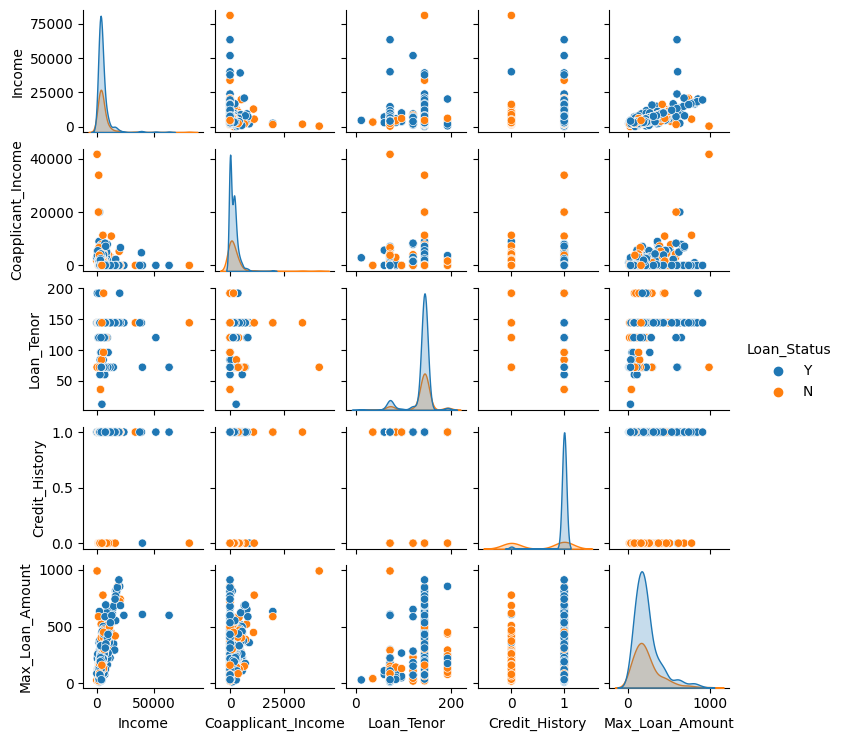

In [ ]:
# A pair-plot to show the distribution of data values between numerical columns based on loan status ( 0, 1 )
sns.pairplot(data , hue="Loan_Status" , height=1.5)
plt.show()

#### **4. Data Preprocessing**

In [ ]:
# Dropping records containing missing values
data.dropna( inplace=True )

print("\nThe data after dropping missing values :")
print(data.info())


The data after dropping missing values :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 1 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              513 non-null    object 
 1   Married             513 non-null    object 
 2   Dependents          513 non-null    object 
 3   Education           513 non-null    object 
 4   Income              513 non-null    int64  
 5   Coapplicant_Income  513 non-null    float64
 6   Loan_Tenor          513 non-null    float64
 7   Credit_History      513 non-null    float64
 8   Property_Area       513 non-null    object 
 9   Max_Loan_Amount     513 non-null    float64
 10  Loan_Status         513 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 48.1+ KB
None


#### **5. Data Splitting**

In [ ]:
x = data.drop(["Loan_Status" , "Max_Loan_Amount" ] , axis = 1 )
LS_y = data["Loan_Status"]
MLA_y = data["Max_Loan_Amount"]

In [ ]:
# The data is shuffled and split into training and testing sets
# For Loan_Status prediction ( Binary Classification ) , for Max_Loan_Amount prediction ( Regression )
x_train, x_test, ls_y_train, ls_y_test , mla_y_train , mla_y_test= train_test_split(x, LS_y, MLA_y , test_size=0.2, random_state=42)

In [ ]:
# Printing the data and shape ( dimension ) of the training and testing data
print("\nX_train : ")
print(x_train.head())
print(x_train.shape)

print("\nX_test : ")
print(x_test.head())
print(x_test.shape)

print("\nLoan Status y_train : ")
print(ls_y_train.head())
print(ls_y_train.shape)

print("\nLoan Status y_test : ")
print(ls_y_test.head())
print(ls_y_test.shape)

print("\nMax. Loan Amount y_train : ")
print(mla_y_train.head())
print(mla_y_train.shape)

print("\nMax. Loan Amount y_test : ")
print(mla_y_test.head())
print(mla_y_test.shape)


X_train : 
     Gender Married Dependents Education  Income  Coapplicant_Income  \
385    Male      No          1  Graduate    3667                 0.0   
396  Female      No          0  Graduate    3180                 0.0   
210  Female      No          0  Graduate   10000                 0.0   
327    Male     Yes          0  Graduate    5818              2160.0   
590    Male     Yes          0  Graduate    3000              3416.0   

     Loan_Tenor  Credit_History Property_Area  
385        72.0             1.0         Urban  
396       144.0             0.0         Urban  
210       144.0             1.0     Semiurban  
327       144.0             1.0     Semiurban  
590        72.0             1.0     Semiurban  
(410, 9)

X_test : 
     Gender Married Dependents     Education  Income  Coapplicant_Income  \
366    Male      No          0      Graduate    2500                 0.0   
595    Male      No          0  Not Graduate    3833                 0.0   
527    Male     Yes

#### **6. Data encoding**

In [ ]:
# Binary ( dictionary ) Encoding for training categorical features
binary_dict = { "Male" : 0 ,  "Female" : 1 , "No" : 0 , "Yes": 1 , "Not Graduate" : 0 , "Graduate" : 1}
columns_to_map = ["Gender", "Married", "Education"]
x_train[columns_to_map] = x_train[columns_to_map].replace(binary_dict)

# One Hot Encoding for training categorical features
x_train = pd.get_dummies(x_train, columns=["Dependents" , "Property_Area" ], drop_first=True)
print("\nX_train after encoding :" )
print( x_train.info())
print(x_train)


X_train after encoding :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 385 to 124
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   410 non-null    int64  
 1   Married                  410 non-null    int64  
 2   Education                410 non-null    int64  
 3   Income                   410 non-null    int64  
 4   Coapplicant_Income       410 non-null    float64
 5   Loan_Tenor               410 non-null    float64
 6   Credit_History           410 non-null    float64
 7   Dependents_1             410 non-null    uint8  
 8   Dependents_2             410 non-null    uint8  
 9   Dependents_3+            410 non-null    uint8  
 10  Property_Area_Semiurban  410 non-null    uint8  
 11  Property_Area_Urban      410 non-null    uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 27.6 KB
None
     Gender  Married  Education  Income  Coap

In [ ]:
# Binary Encoding for testing categorical features
x_test[columns_to_map] = x_test[columns_to_map].replace(binary_dict)

# One Hot Encoding for testing categorical features
x_test = pd.get_dummies(x_test, columns=["Dependents" , "Property_Area" ], drop_first=True)
print("\nX_test after encoding :")
print(x_test.info())
print(x_test)


X_test after encoding :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 366 to 609
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   103 non-null    int64  
 1   Married                  103 non-null    int64  
 2   Education                103 non-null    int64  
 3   Income                   103 non-null    int64  
 4   Coapplicant_Income       103 non-null    float64
 5   Loan_Tenor               103 non-null    float64
 6   Credit_History           103 non-null    float64
 7   Dependents_1             103 non-null    uint8  
 8   Dependents_2             103 non-null    uint8  
 9   Dependents_3+            103 non-null    uint8  
 10  Property_Area_Semiurban  103 non-null    uint8  
 11  Property_Area_Urban      103 non-null    uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 6.9 KB
None
     Gender  Married  Education  Income  Coappl

In [ ]:
# Binary Encoding for target feature
loanstatus_dict = {  "N" : 0  , "Y" : 1 }
ls_y_train = ls_y_train.map(loanstatus_dict)
ls_y_test = ls_y_test.map(loanstatus_dict)

#### **7. Data scaling**

In [ ]:
# RobustScaler will be used as it isn't sensitive to outliers ( in case of their existence )
scaler = RobustScaler()
x_train[["Income" , "Coapplicant_Income" , "Loan_Tenor"]] = scaler.fit_transform(x_train[["Income" , "Coapplicant_Income" , "Loan_Tenor"]])
x_test[["Income" , "Coapplicant_Income" , "Loan_Tenor"]] = scaler.transform(x_test[["Income" , "Coapplicant_Income" , "Loan_Tenor"]])

#### **8. Modeling**

In [ ]:
# Linear Regression model to predict the max. loan amount ( continous values )
reg_model = LinearRegression()

# Train the model
reg_model.fit(x_train , mla_y_train)

# Test the model
y_pred = reg_model.predict(x_test)

# Evaluate the model
r2 = r2_score(mla_y_test, y_pred)
mse = mean_squared_error(mla_y_test , y_pred)

print("\nLinear Regression : ")
print(f'Mean Squared Error : {mse}')  # We concluded that ,on average, the squared difference between your model's predictions and the actual values is quite large
print("R-squared (R2) Score:", r2)
print(f'Training score : {reg_model.score(x_train,mla_y_train)} \nTest score : {reg_model.score(x_test, mla_y_test)}')
print("_________________________________________________________________________________________")


Linear Regression : 
Mean Squared Error : 25640.530855634544
R-squared (R2) Score: -0.2886455648242652
Training score : 0.8486369039104348 
Test score : -0.2886455648242652
_________________________________________________________________________________________


In [ ]:
# Binary Classification model to predict the loan status ( 0 , 1 )

# Sigmoid activation function --> to make the output of the hypothesis function between 0 and 1.
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

# Logistic regression hypothesis function --> to calculates the predicted probabilities using the sigmoid function.
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Compute the logistic regression cost  -> It computes the log-likelihood cost based on the predicted probabilities and the actual labels.
def compute_cost(X, Y, theta):
    m = len(Y)
    h = hypothesis(X, theta)
    cost = -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return cost

#  Gradient descent optimization for logistic regression --> iteratively updates the parameters (theta) based on the gradient of the cost function.
def gradient_descent(X, Y, theta, learning_rate = 0.01 , num_iterations = 1000):
    m = len(Y)
    costs = []
    for _ in range(num_iterations):
        h = hypothesis(X, theta)
        gradient = np.dot(X.T, (h - Y)) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
    return theta, costs

# Train logistic regression model --> It adds a bias term to the input features, initializes the parameters, and then calls the
# gradient descent function to optimize the parameters.
def logistic_regression(X, Y, learning_rate=0.01, num_iterations=1000):
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    theta, costs = gradient_descent(X, Y, theta, learning_rate, num_iterations)
    return theta, costs


# A function to predict the accuracy of the logistic regression model

# Predict labels based on logistic regression model
# X : input features , theta : learned parameters
def Predict(X, theta, threshold=0.5):
    # To calculate the predicted probabilities using the logistic regression model
    probabilities = hypothesis(X, theta)
    # To Converts probabilities to binary predictions based on the threshold
    return (probabilities >= threshold).astype(int)


# Calculate accuracy of logistic regression model
#  y : actual labels
def calculate_accuracy(X, Y, theta, threshold=0.5):
    X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    predictions = Predict(X, theta, threshold)
    # To Compares binary predictions with actual labels and calculates the accuracy as the ratio of correct predictions
    correct_predictions = (predictions == Y).astype(int)
    accuracy = np.mean(correct_predictions)
    return accuracy

In [ ]:
# Train the model
theta , costs = logistic_regression(x_train , ls_y_train)
print("\nLearned Parameters (Theta):", theta)
print("\nFinal Cost:", costs[-1])


Learned Parameters (Theta): [ 0.02018899 -0.06193084  0.16389901  0.12434416 -0.0413818  -0.04876586
  0.004442    0.77497553 -0.04593601  0.08689344 -0.01232683  0.29488237
 -0.10123713]

Final Cost: 0.5481222758735258


In [ ]:
# Testing and evaluating the model

# Calculate accuracy on the training set
train_accuracy = calculate_accuracy(x_train,ls_y_train, theta)

# Calculate accuracy on the test set
test_accuracy = calculate_accuracy(x_test, ls_y_test, theta)

# Print the accuracies
print("\nLogistic Regression : ")
print("\nTraining Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("_________________________________________________________________________________________")


Logistic Regression : 

Training Accuracy: 0.7097560975609756
Test Accuracy: 0.7281553398058253
_________________________________________________________________________________________


##**Testing data**

#### **2.Loading the data**

In [ ]:
new_data = pd.read_csv("loan_new.csv")
print("\nNew ( testing ) data : ")
print(new_data.info())


New ( testing ) data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Gender              356 non-null    object 
 2   Married             367 non-null    object 
 3   Dependents          357 non-null    object 
 4   Education           367 non-null    object 
 5   Income              367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Tenor          360 non-null    float64
 8   Credit_History      338 non-null    float64
 9   Property_Area       367 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 28.8+ KB
None


#### **3.Data Exploration**

In [ ]:
# To print the data with it's dimensions ( no. of rows and columns )
print(new_data)

      Loan_ID Gender Married Dependents     Education  Income  \
0    LP001015   Male     Yes          0      Graduate    5720   
1    LP001022   Male     Yes          1      Graduate    3076   
2    LP001031   Male     Yes          2      Graduate    5000   
3    LP001035   Male     Yes          2      Graduate    2340   
4    LP001051   Male      No          0  Not Graduate    3276   
..        ...    ...     ...        ...           ...     ...   
362  LP002971   Male     Yes         3+  Not Graduate    4009   
363  LP002975   Male     Yes          0      Graduate    4158   
364  LP002980   Male      No          0      Graduate    3250   
365  LP002986   Male     Yes          0      Graduate    5000   
366  LP002989   Male      No          0      Graduate    9200   

     Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  
0                     0       144.0             1.0         Urban  
1                  1500       144.0             1.0         Urban  
2              

In [ ]:
# Dropping not important feature
new_data.drop( "Loan_ID" , axis = 1 , inplace=True)

In [ ]:
# Checking for missing values in each column
print("\nMissing values in each column in the new data :")
print(new_data.isnull().sum())


Missing values in each column in the new data :
Gender                11
Married                0
Dependents            10
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor             7
Credit_History        29
Property_Area          0
dtype: int64


In [ ]:
# Checking the type of each feature (categorical or numerical)
print("\nThe data type of each column in the new data : " )
print( new_data.dtypes)


The data type of each column in the new data : 
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income      int64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
dtype: object


In [ ]:
# Checking the numerical features distributions ( whether have the same scale or not )
print("\nStatistical analysis for each column in the new data :")
print(new_data.describe())   # We concluded that the data doesn't have the same scale ( range of values )


Statistical analysis for each column in the new data :
             Income  Coapplicant_Income  Loan_Tenor  Credit_History
count    367.000000          367.000000  360.000000      338.000000
mean    4805.599455         1569.577657  138.188889        0.825444
std     4910.685399         2334.232099   22.460560        0.380150
min        0.000000            0.000000   12.000000        0.000000
25%     2864.000000            0.000000  144.000000        1.000000
50%     3786.000000         1025.000000  144.000000        1.000000
75%     5060.000000         2430.500000  144.000000        1.000000
max    72529.000000        24000.000000  192.000000        1.000000


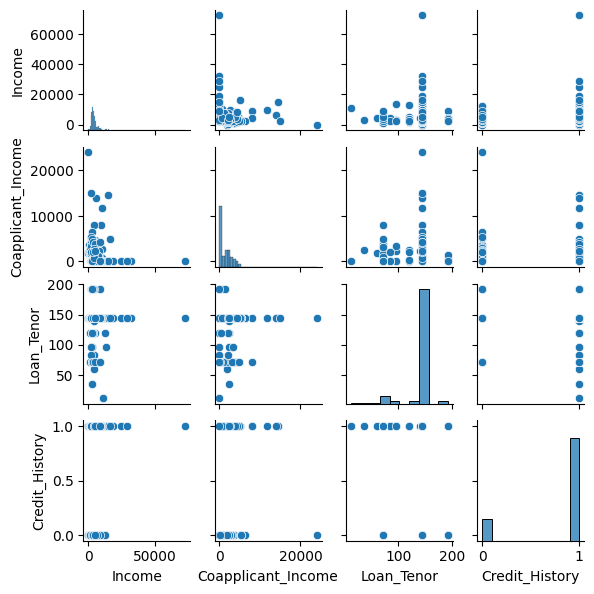

In [ ]:
# A pair-plot to show the distribution of data values between numerical columns based on loan status ( 0, 1 )
sns.pairplot(new_data  , height=1.5)
plt.show()

#### **4. Data Preprocessing**

In [ ]:
# Dropping records containing missing values
new_data.dropna( inplace=True )
print("\nThe Cleaned new dataset after dropping missing values :")
print(new_data.info())


The Cleaned new dataset after dropping missing values :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 366
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              314 non-null    object 
 1   Married             314 non-null    object 
 2   Dependents          314 non-null    object 
 3   Education           314 non-null    object 
 4   Income              314 non-null    int64  
 5   Coapplicant_Income  314 non-null    int64  
 6   Loan_Tenor          314 non-null    float64
 7   Credit_History      314 non-null    float64
 8   Property_Area       314 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 24.5+ KB
None


#### **5. Data Encoding**

In [ ]:
# Binary Encoding for new testing data categorical features
new_data[columns_to_map] = new_data[columns_to_map].replace(binary_dict)

# One Hot Encoding for new testing data categorical features
new_data = pd.get_dummies(new_data, columns=["Dependents" , "Property_Area" ], drop_first=True)
print("\nNew data after encoding : " )
print(new_data)


New data after encoding : 
     Gender  Married  Education  Income  Coapplicant_Income  Loan_Tenor  \
0         0        1          1    5720                   0       144.0   
1         0        1          1    3076                1500       144.0   
2         0        1          1    5000                1800       144.0   
4         0        0          0    3276                   0       144.0   
5         0        1          0    2165                3422       144.0   
..      ...      ...        ...     ...                 ...         ...   
361       0        1          1    2269                2167       144.0   
362       0        1          0    4009                1777       144.0   
363       0        1          1    4158                 709       144.0   
365       0        1          1    5000                2393       144.0   
366       0        0          1    9200                   0        72.0   

     Credit_History  Dependents_1  Dependents_2  Dependents_3+  \
0    

#### **6. Data scaling**

In [ ]:
# RobustScaler will be used as it isn't sensitive to outliers ( in case of their existence )
new_data[["Income" , "Coapplicant_Income" , "Loan_Tenor"]] = scaler.transform(new_data[["Income" , "Coapplicant_Income" , "Loan_Tenor"]])

#### **7.Modeling**

In [ ]:
# Predicting the two target variables :
# Loan Status--> Logistic Regression

# Add a column of ones for the bias term
new_df = np.c_[np.ones(new_data.shape[0]), new_data]
new_data["Binary_Loan_Status"] = Predict(new_df , theta )
new_data["Loan_Status"] = new_data["Binary_Loan_Status"].apply(lambda x: "Y" if x == 1 else "N")
print("\n New data after predicting Loan Status : \n" , new_data)


 New data after predicting Loan Status : 
      Gender  Married  Education    Income  Coapplicant_Income  Loan_Tenor  \
0         0        1          1  0.646651           -0.501645         0.0   
1         0        1          1 -0.257976            0.179013         0.0   
2         0        1          1  0.400308            0.315145         0.0   
4         0        0          0 -0.189548           -0.501645         0.0   
5         0        1          0 -0.569669            1.051163         0.0   
..      ...      ...        ...       ...                 ...         ...   
361       0        1          1 -0.534086            0.481679         0.0   
362       0        1          0  0.061244            0.304708         0.0   
363       0        1          1  0.112223           -0.179921         0.0   
365       0        1          1  0.400308            0.584231         0.0   
366       0        0          1  1.837311           -0.501645       -72.0   

     Credit_History  Dependents

In [ ]:
# Max. Loan Amount --> Linear Regression

# To remove the two columns of the binary predicted variables ( 1st target variable )
# to predict the 2nd onr ( continous values )
reg_new_data = new_data.drop(["Binary_Loan_Status" , "Loan_Status"] , axis = 1)

reg_new_data["Max_Loan_Amount"] = reg_model.predict(reg_new_data)
print("\n New data after predicting Max. Loan Amount : \n" , reg_new_data)


 New data after predicting Max. Loan Amount : 
      Gender  Married  Education    Income  Coapplicant_Income  Loan_Tenor  \
0         0        1          1  0.646651           -0.501645         0.0   
1         0        1          1 -0.257976            0.179013         0.0   
2         0        1          1  0.400308            0.315145         0.0   
4         0        0          0 -0.189548           -0.501645         0.0   
5         0        1          0 -0.569669            1.051163         0.0   
..      ...      ...        ...       ...                 ...         ...   
361       0        1          1 -0.534086            0.481679         0.0   
362       0        1          0  0.061244            0.304708         0.0   
363       0        1          1  0.112223           -0.179921         0.0   
365       0        1          1  0.400308            0.584231         0.0   
366       0        0          1  1.837311           -0.501645       -72.0   

     Credit_History  Depen